<img src="Auswahl_2015-11-27_001.png"/>

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2015-11-27_002.png"/>

In [1]:
# prepare data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

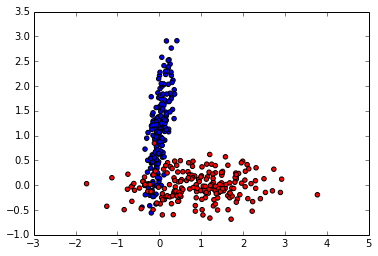

In [2]:
cov1 = [[0.1, 0.7], 
       [0, 0.1]]
cov2 = [[0.7, 0], 
       [0.1, 0.1]]

mean1 = [0. , 1.]
mean2 = [1. , 0.]

X1,y1 = np.random.multivariate_normal(mean1, cov1, 200).T
X2,y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.scatter(X1, y1, c='blue')
plt.scatter(X2, y2, c='red')
plt.show()

In [3]:
from sklearn.lda import LDA

In [4]:
X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
y = np.ones(X.shape[0])
y[:X.shape[0]/2] *= -1

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X,y)

print 'weights:\n',lda.coef_
print 'b:\n',lda.intercept_

weights:
[[-1.33867463]
 [ 1.33867463]]
b:
[-1.58917206 -1.58917206]


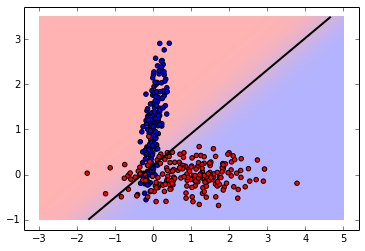

In [167]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'blue': [(0, 0.7, 0.7), (1, 1, 1)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'red': [(0, 1, 1), (1, 0.7, 0.7)]})
def plot_fisher(model):
    plt.cm.register_cmap(cmap=cmap)

    plt.scatter(X1, y1, c='blue')
    plt.scatter(X2, y2, c='red')

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    plt.scatter(X1, y1, c='blue')
    plt.scatter(X2, y2, c='red')

    plt.show()
plot_fisher(lda)

LDA can only learn linear boundries. quadratic lda is more flexible, see the next example

In [6]:
from sklearn.qda import QDA

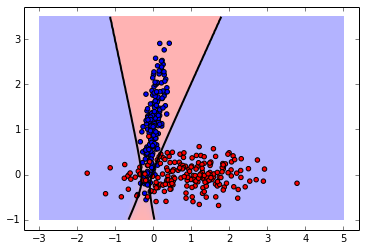

In [7]:
qda = QDA()
qda.fit(X,y)

plot_fisher(qda)

We have seen that LDA yields good results for equal covariances. As the example above showed, this may not hold true if the covariances differ. QDA was proposed as a model to induce more flexibility to LDA.

<img src="Auswahl_2015-11-27_003.png"/>

<img src="Auswahl_2015-11-27_004.png"/>

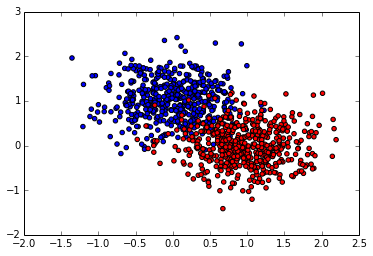

In [102]:
def gen_data(N, plot=False):
    cov = np.eye(2)*0.2

    mean1 = [0. , 1.]
    mean2 = [1. , 0.]

    X1,y1 = np.random.multivariate_normal(mean1, cov, N/2).T
    X2,y2 = np.random.multivariate_normal(mean2, cov, N/2).T
    
    if plot:
        plt.scatter(X1, y1, c='blue')
        plt.scatter(X2, y2, c='red')
        plt.show()

    X = np.hstack((np.vstack((X1,y1)),np.vstack((X2,y2)))).T
    y = np.ones(X.shape[0])
    y[:X.shape[0]/2] *= -1
    return X,y
dummy = gen_data(1000,True)

<img src="Auswahl_2015-11-27_005.png"/>

In [103]:
from numpy.linalg import lstsq

In [158]:
X,y = gen_data(50)
A = np.vstack([np.ones(len(X[:,0])), X[:,0]]).T
res = lstsq(X,y)
w,b = res[0],res[1]

<img src="Auswahl_2015-11-27_006.png"/>

In [159]:
print w,X.shape,b

[ 0.74321561 -0.70748601] (50, 2) [ 10.48787065]


In [169]:
X_test, y_test = gen_data(1000)
pred = np.sign(w.dot(X_test.T)) == y_test

<img src="Auswahl_2015-11-27_007.png"/>

In [161]:
print pred.sum()/float(len(pred))

0.941


<img src="Auswahl_2015-11-27_008.png"/>

In [164]:
Ns = [2,4,6,8,10,20,40,100]
params = [[None] * 50] * len(Ns)
perc_train = np.zeros((len(Ns), 50))
perc_test = np.zeros((len(Ns), 50))
for i, N in enumerate(Ns):
    for j in range(50):
        X, y = gen_data(N)
        A = np.vstack([np.ones(len(X[:,0])), X[:,0]]).T
        res = lstsq(X,y)
        w, b = res[0],res[1]
        params[i][j] = [w, b]
        X_test, y_test = gen_data(1000)
        pred = np.sign(w.dot(X.T)) == y
        perc_train[i,j] = pred.sum()/float(len(pred))
        pred = np.sign(w.dot(X_test.T)) == y_test
        perc_test[i,j] = pred.sum()/float(len(pred))
params = np.array(params)

<img src="Auswahl_2015-11-27_009.png"/>

In [165]:
print 'overall means, to see if everything makes sense'
_w = params[:,:,0].mean()
print 'w_1:',_w[0],'\tw_2:',_w[1]
_b = params[:,:,1].mean()
print 'b:',_b[0]
print 'r_train:',perc_train.mean(),'\tr_test:',perc_test.mean()

overall means, to see if everything makes sense
w_1: 0.727359017892 	w_2: -0.72538595073
b: 28.9945180242
r_train: 0.956883333333 	r_test: 0.9263575


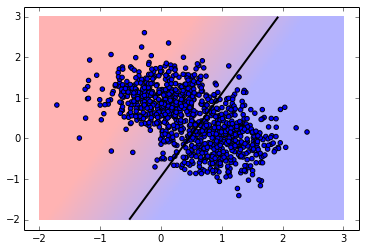

In [179]:
X,y = gen_data(1000)
plt.scatter(X[:,0], X[:,1])
A = np.vstack([X[:,0], np.ones(len(X[:,0]))]).T
res = lstsq(A,y)
w, b = res[0],res[1]
xi = np.arange(-1,3)
#plt.plot(xi,w[0]+w[1]*xi,'r')
plt.cm.register_cmap(cmap=cmap)

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = w.dot(np.array([xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(-1,1))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')
plt.scatter(X[:,0], X[:,1])
plt.show()

<img src="Auswahl_2015-11-27_015.png"/>

<img src="Auswahl_2015-11-27_011.png"/>

<img src="Auswahl_2015-11-27_012.png"/>

<img src="Auswahl_2015-11-27_013.png"/>

<img src="Auswahl_2015-11-27_014.png"/>